In [1]:
# Loading all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the dataset of user 5
User5 = pd.read_csv('User5_BEHACOM.csv', encoding='latin1')

In [3]:
# Dropping the unnecessary columns
B = User5.drop(columns=['current_app', 'penultimate_app','USER', 'timestamp'])

In [4]:
# Defining training set
B_train = B

# Random scalar
x = 50 

# Defining the testing data        
B_test = B * x

In [5]:
# Scaling the sets
scaler = MinMaxScaler()

# The training data is fitted and transformed
B_train_scaled = scaler.fit_transform(B_train)

# The testing data is transformed
B_test_scaled = scaler.transform(B_test)

print(B_test_scaled)
print(B_train_scaled)

[[2.09790210e+00 0.00000000e+00 0.00000000e+00 ... 1.29175947e+00
  5.37034052e-03 2.85532407e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.45879733e-01
  1.32712792e-03 4.76855520e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.20712695e+00
  2.07160045e-02 7.29332711e-02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.68151448e-02
  1.38578825e-02 1.17292077e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.00445434e-01
  1.68348540e-02 1.16334286e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.69265033e+00
  4.08769314e-01 4.72925244e-01]]
[[4.19580420e-02 0.00000000e+00 0.00000000e+00 ... 2.58351893e-02
  1.06134249e-04 1.85902678e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29175947e-02
  2.52699967e-05 5.68548904e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.41425390e-02
  4.13047528e-04 1.07350328e-03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.33630290e-03
  2.75885089e-04 2.34198992e-01]

In [6]:
# Constructing the One Class SVM model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

In [7]:
# Fitting the model with the training data
model.fit(B_train_scaled)

OneClassSVM(nu=0.1)

In [8]:
# Deriving the decision function values
decisionf = model.decision_function(B_train_scaled)

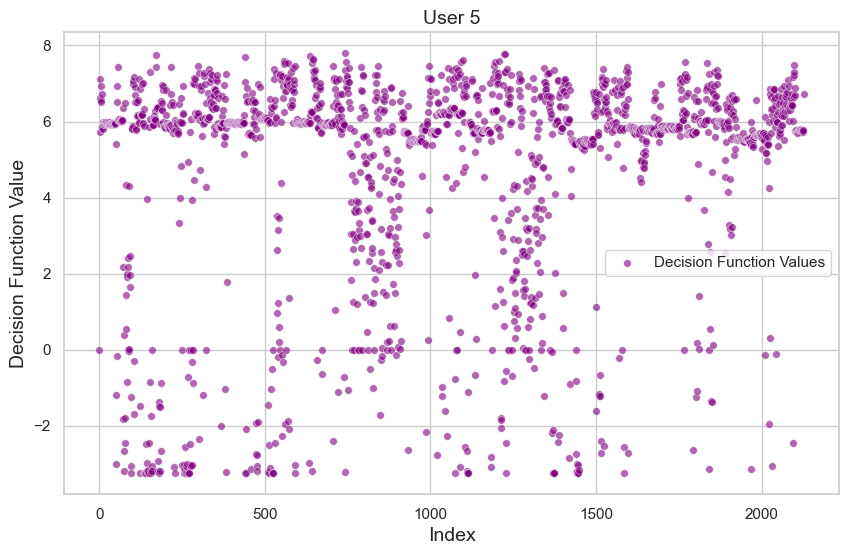

In [9]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Customising the plots
plt.title('User 5', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()